# Fourier Transform In Practice

## Imports

In [92]:
import numpy as np
from matplotlib import pyplot as plt
#import mpld3
import scipy as sp
from scipy import io, signal
%matplotlib inline

## Computing the Fourier Transform

Let's make a signal that is composed of two sine waves at 2 Hz and 3 Hz plus some random noise.

In [7]:
fs = 50
ts = np.arange(0, 10, 1/fs)
s2 = np.sin(2 * np.pi * 2 * ts)
s3 = np.sin(2 * np.pi * 3 * ts)
s = s2 + s3 + np.random.randn(len(s2)) * 1

We use the `np.fft` module to help us compute the Fourier transform. `rfftfreq` tells us the frequencies for which we are computing the Fourier transform. `rfft` computes the actual Fourier transform coefficients. We use the `rfft` and `rfftfreq` functions instead of `fft` and `fftfreq` because we know our signals will only ever contain real numbers (as opposed to complex). You don't really need to know the difference for now.

In [8]:
# Get the center of frequency bins in Frequency domain
freqs = np.fft.rfftfreq(len(s), 1/fs)
# Get the Fourier coefficients
fft = np.fft.rfft(s) 

By examining `freqs`, we see that the FFT samples the Fourier transform uniformly from 0 Hz to the Nyquist frequency, which in this case is 25 Hz because our sampling rate is 50 Hz.

In [9]:
freqs

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

The actual Fourier transform coefficients are complex numbers because they describe not only the magnitude of the frequency component in the signal but also its phase. Most of the time, we're just interested in the magnitude, which we can get by using `np.abs`.

In [12]:
# getting the amplitude values of the fourier coefficients
np.abs(fft) 

array([  6.02117825,   4.25009421,  27.79993017,  15.58568601,
         3.5476654 ,   9.81398352,  10.98076381,  50.10407134,
         7.49018228,  23.5929357 ,  14.57237172,  16.07802862,
        30.72409581,  37.15244945,  31.40321142,  18.28723905,
        12.13795503,   9.6949284 ,  10.06826117,   8.75666446,
       253.68278698,  45.00349537,   9.67881361,  30.80533479,
        10.24690575,  19.93761697,   9.60929714,  28.01492111,
        26.63875228,   6.89674716, 255.29007834,  10.58238058,
        16.02978713,  26.4531183 ,  12.80180392,  28.32691023,
        17.58190361,  13.62608212,  19.45910081,   5.07022131,
        42.25863728,  21.35367368,   9.54258169,  33.46234157,
        36.92974722,  60.55488921,   5.22719179,  32.45073984,
        20.40156098,  12.84250955,  18.83294919,  23.64012642,
         4.64557212,  14.02630641,  17.58406468,   6.66962969,
        12.01408029,   6.15184834,  13.84093806,  18.65813887,
        29.56368768,  21.64354146,  32.82468274,  15.14

The output of the real FFT is half the length of the input signal (plus 1).
The reason is that it takes only positive frequencies

In [15]:
len(fft), len(freqs), len(s)

(251, 251, 500)

If we want both negative and positive frequencies then the lenght would be the full lenght of the input signal. Something like below:

In [18]:
positive_negative_fft = np.fft.fft(s) 
len(fft),len(positive_negative_fft), len(s)

(251, 500, 500)

Plotting the FFT, we see that the signal is composed primarily of two frequencies (2 and 3Hz) and a little bit of everything else (from the random noise).

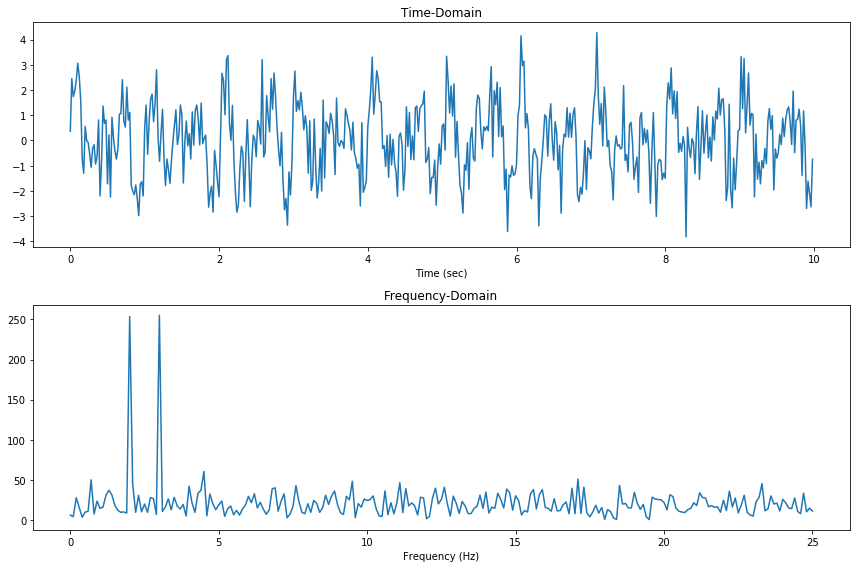

In [21]:
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(ts, s)
plt.title('Time-Domain')
plt.xlabel('Time (sec)')
plt.subplot(2,1,2)
plt.plot(freqs, np.abs(fft))
plt.title('Frequency-Domain')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

## Zero Padding

Let's change the frequency slightly to be in between the `freqs` array above.

In [45]:
fs = 50
ts = np.arange(0, 10, 1/fs)
s2 = np.sin(2 * np.pi * 2.35 * ts)
s3 = np.sin(2 * np.pi * 3.65 * ts)
s = s2 + s3

The peaks in the Fourier transform aren't as sharp and there's no value for the true frequency 2.35 Hz. So with just this plot, it's hard to tell what the true frequency of the signal is. We're not sampling the Fourier transform with high enough resolution to see the power at 2.35 Hz.

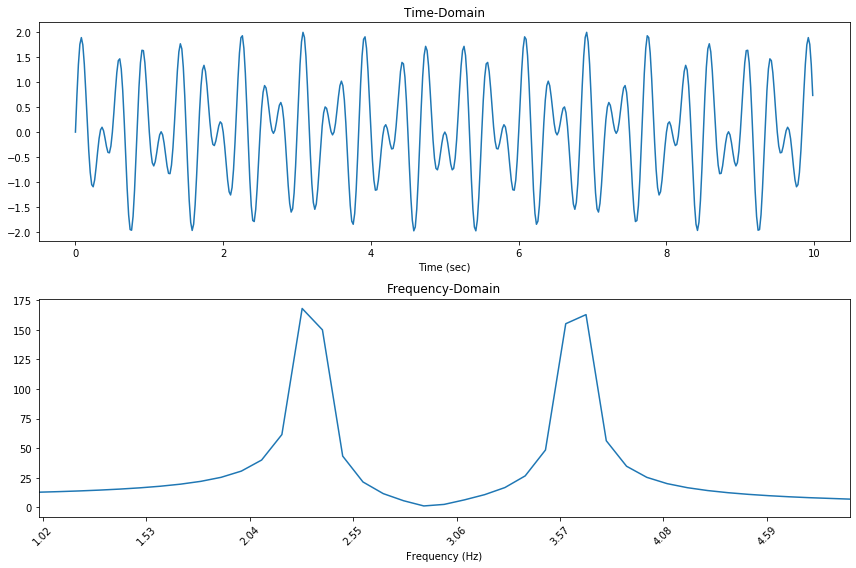

In [52]:
freqs = np.fft.rfftfreq(len(s), 1/fs)
fft = np.fft.rfft(s)
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(ts, s)
plt.title('Time-Domain')
plt.xlabel('Time (sec)')
plt.subplot(2,1,2)
plt.plot(freqs, np.abs(fft))
plt.title('Frequency-Domain')
plt.xlabel('Frequency (Hz)')
plt.xticks(np.linspace(0,25,50), rotation=45)
plt.xlim((1, 5))
plt.tight_layout()

Remember, the real Fourier transform's output is half the length of the signal input and that it will always evenly sample all frequencies from 0 to the Nyquist frequency. So at a sampling rate of 50 Hz and an input signal of length 500, it will give us 251 samples between 0 and 25. This means we're sampling at 0 and 0.1 and 0.2 Hz as we saw in the freqs array, but we don't sample at 2.35 Hz, which is the actual frequency of the signal. To do that, we actually need to sample twice as often. We need 500 samples between 0 and 25 Hz. We can do this by adding 0s to the end of the signal.

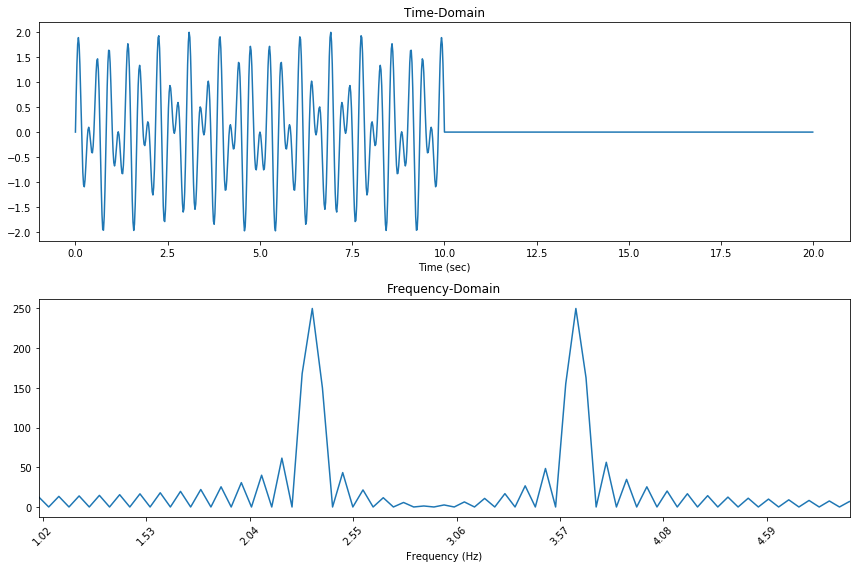

In [54]:
padded_s = np.hstack((s, np.zeros(len(s))))
padded_ts = np.arange(0, 20, 1/fs)
freqs = np.fft.rfftfreq(len(padded_s), 1/fs)
fft = np.fft.rfft(padded_s)
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(padded_ts, padded_s)
plt.title('Time-Domain')
plt.xlabel('Time (sec)')
plt.subplot(2,1,2)
plt.plot(freqs, np.abs(fft))
plt.xticks(np.linspace(0,25,50), rotation=45)
plt.xlim((1, 5))
plt.title('Frequency-Domain')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

Now we have all the points we need and see a nice sharp peak at 2.35 Hz and 3.65 Hz. However, we also see this rippling, which is an artifact of padding the signal with 0s, which is the trade-off when doing 0-padding.

Numpy makes this convenient for us and has a parameter to the function that lets us take a 0-padded FFT without actually having to pad the signal ourselves.

In [55]:
# fftlen is a variable that holds the number of zero pad we want to add to the FFT signal input
fftlen = len(s) * 2
freqs = np.fft.rfftfreq(fftlen, 1/fs)
fft = np.fft.rfft(s, fftlen)

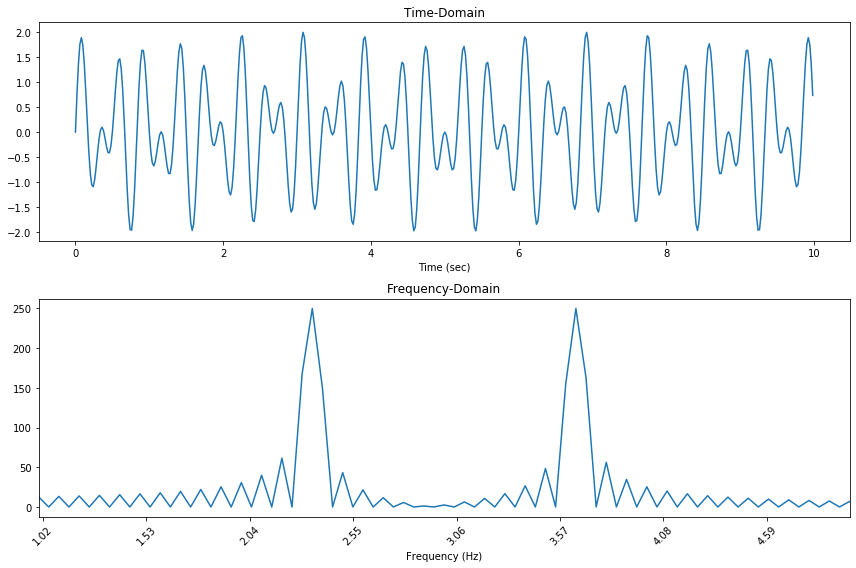

In [57]:
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(ts, s)
plt.title('Time-Domain')
plt.xlabel('Time (sec)')
plt.subplot(2,1,2)
plt.plot(freqs, np.abs(fft))
plt.xticks(np.linspace(0,25,50), rotation=45)
plt.xlim((1, 5))
plt.title('Frequency-Domain')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

## Inverse FFT

The Fourier transform is invertible. This means we can modify the signal in "frequency-domain" and then take the inverse FFT to recover our "time-domain" signal.

Recreate the original noisy signal.

In [58]:
fs = 50
ts = np.arange(0, 10, 1/fs)
s2 = np.sin(2 * np.pi * 2 * ts)
s3 = np.sin(2 * np.pi * 3 * ts)
s = s2 + s3 + np.random.randn(len(s2)) * 1
freqs = np.fft.rfftfreq(len(s), 1/fs)
fft = np.fft.rfft(s)

Let's remove all frequency components that are not at 2Hz and 3Hz.

In [59]:
new_fft = fft.copy()
new_fft[~np.isin(freqs, (2, 3))] = 0

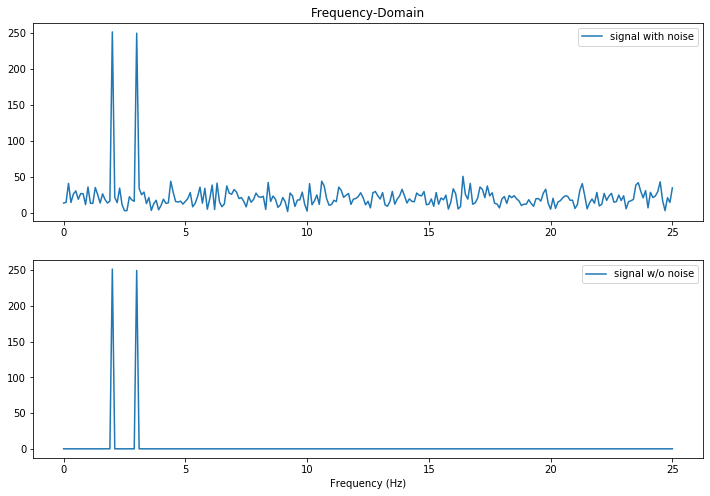

In [66]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(freqs, np.abs(fft))
plt.title('Frequency-Domain')
plt.legend(['signal with noise'])
plt.subplot(212)
plt.plot(freqs, np.abs(new_fft))
plt.xlabel('Frequency (Hz)');
plt.legend(['signal w/o noise']);

We can get our signal back in the time-domain by calling `irfft` on the Fourier transform. After plotting the new signal, we can see that by removing all the other frequency components, we have significantly cleaned up our signal! Imagine doing this in the time-domain.

In [67]:
new_s = np.fft.irfft(new_fft)

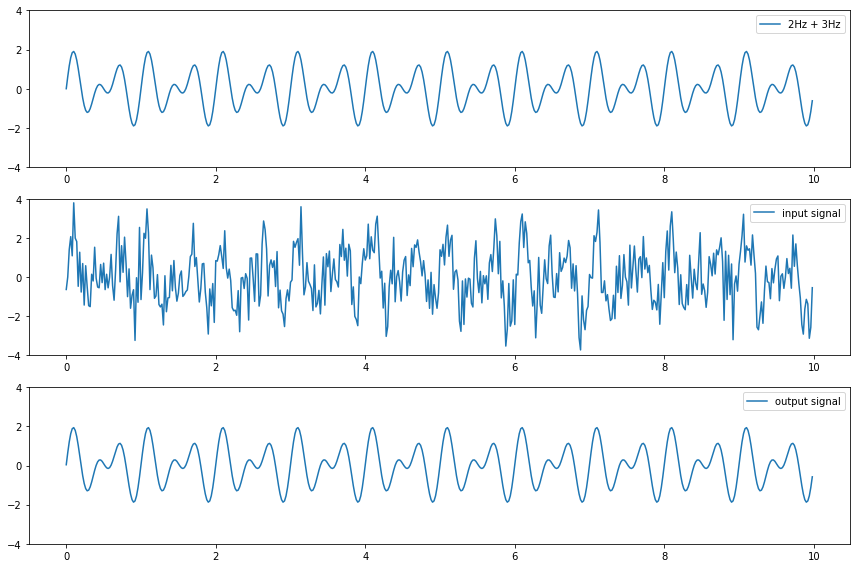

In [69]:
plt.figure(figsize=(12, 8))
plt.clf()
plt.subplot(3, 1, 1)
plt.plot(ts, s2 + s3, label='2Hz + 3Hz')
plt.ylim((-4, 4))
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(ts, s, label='input signal')
plt.ylim((-4, 4))
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(ts, new_s, label='output signal')
plt.ylim((-4, 4))
plt.legend()
plt.tight_layout()

We can see that the signal is recontructed perfectly. However, this will only work if we completely sample the frequencies that we want and we filter out all noise exactly. However, in practive this will not be possible. **Take a look at the example below:**

Let's change the frequencies again slightly. Now the input signal is **2.15 Hz + 2.95 Hz + random noise**

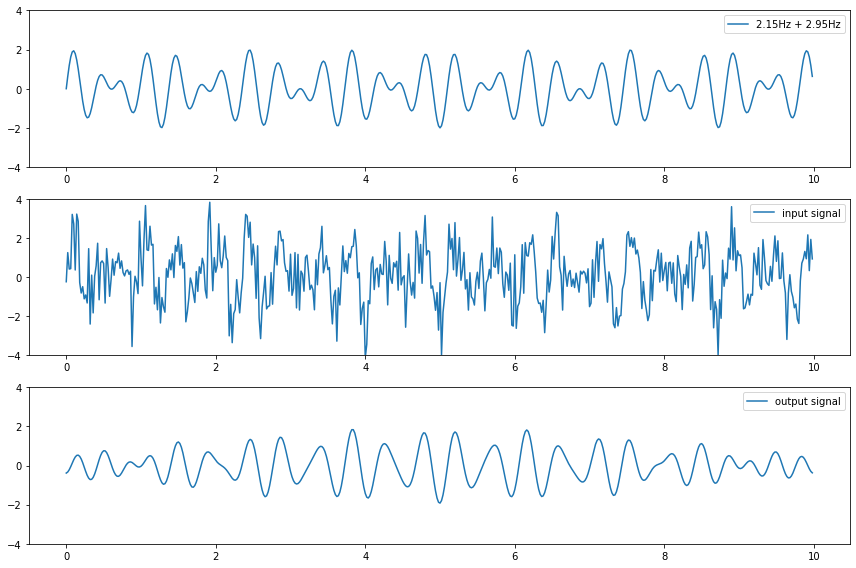

In [78]:
plt.figure(figsize=(12, 8))
s2 = np.sin(2 * np.pi * 2.15 * ts)
s3 = np.sin(2 * np.pi * 2.95 * ts)
sb = s2 + s3 + np.random.randn(len(s2)) * 1
fft = np.fft.rfft(sb)
new_fft = fft.copy()
new_fft[~np.isin(freqs, (2.1, 2.2, 2.9, 3.0))] = 0
new_sb = np.fft.irfft(new_fft)
plt.clf()
plt.subplot(3, 1, 1)
plt.plot(ts, s2 + s3, label='2.15Hz + 2.95Hz')
plt.ylim((-4, 4))
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(ts, sb, label='input signal')
plt.ylim((-4, 4))
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(ts, new_sb, label='output signal')
plt.ylim((-4, 4))
plt.legend()
plt.tight_layout()

The recovered signal looks a bit distorted and not what we'd expect. This is because zeroing out Fourier coefficients is not the best way to filter a signal.

## Bandpass Filter

We can use `scipy` to **bandpass filter** our signal for us. A bandpass filter will remove all frequency components outside of a given passband.

In [79]:
def BandpassFilter(signal, pass_band):
    b, a = sp.signal.butter(5, pass_band, btype='bandpass', fs=50)
    return sp.signal.filtfilt(b, a, signal)

Let's bandpass filter our signal with a passband from 1 Hz to 4 Hz. This way, our desired frequencies of 2.15 Hz and 2.95 Hz are well within the passband.

In [90]:
filtered_s = BandpassFilter(sb, (1.15, 3.95))

And now, our output signal looks very similar to what we want.

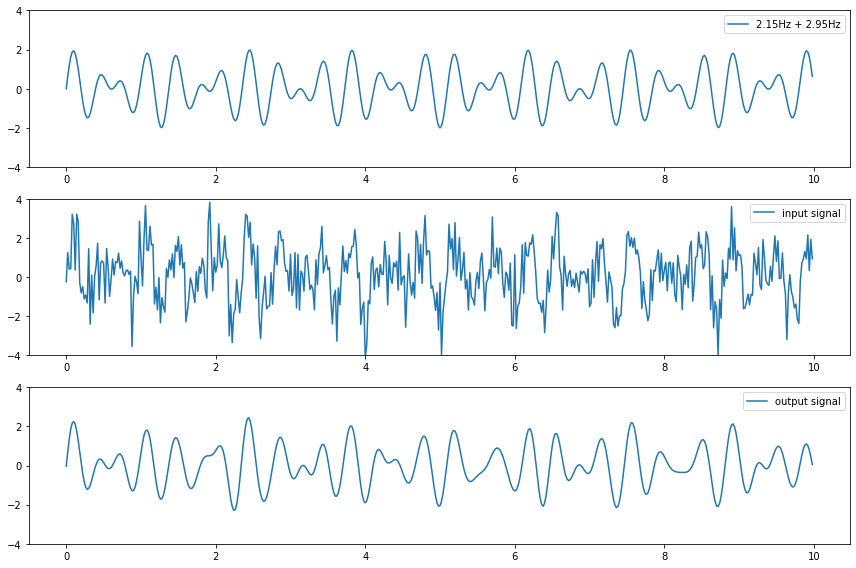

In [91]:
plt.figure(figsize=(12, 8))
plt.clf()
plt.subplot(3, 1, 1)
plt.plot(ts, s2 + s3, label='2.15Hz + 2.95Hz')
plt.ylim((-4, 4))
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(ts, sb, label='input signal')
plt.ylim((-4, 4))
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(ts, filtered_s, label='output signal')
plt.ylim((-4, 4))
plt.legend()
plt.tight_layout()

That's why it is a great approach to bandpass our signals before processing them to remove noise. The signal would not get exactly the same, but it will be close enough most of the times